# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1 (30 min):

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.** One possible solution is shown below:

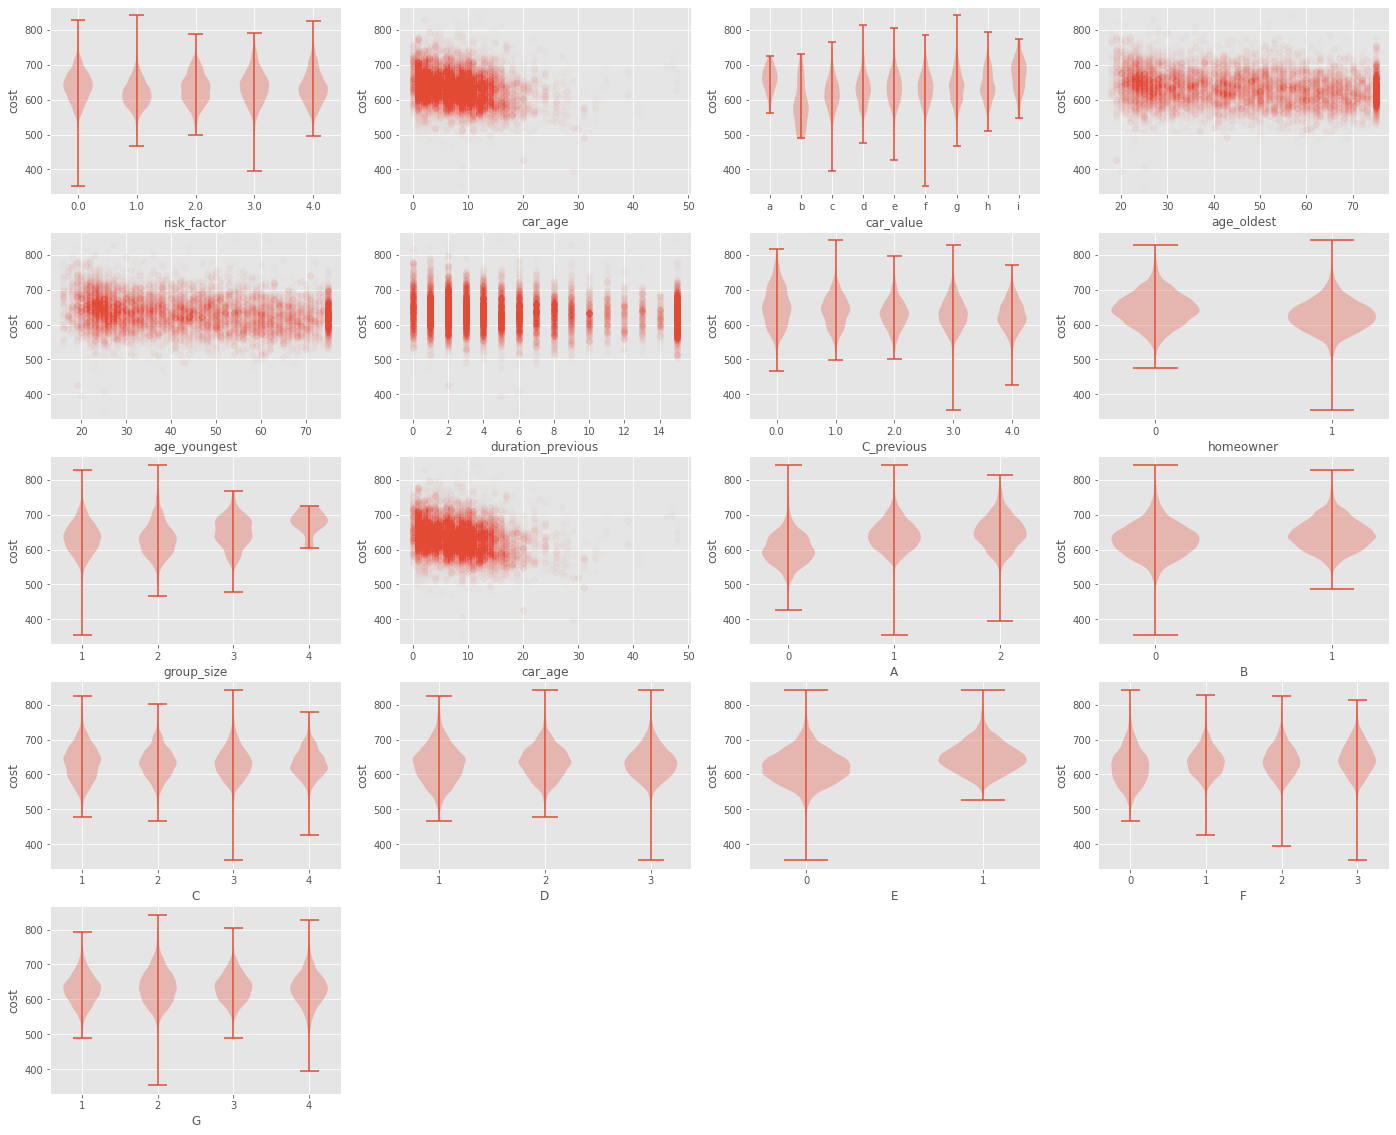

In [4]:
plt.figure(figsize=(24,20))
vars_to_look = ['risk_factor', 'car_age', 'car_value', 'age_oldest', 'age_youngest',
              'duration_previous', 'C_previous', 'homeowner', 'group_size',
              'car_age', 'A', 'B', 'C', 'D', 'E', 'F', 'G'
]

for i, feature in enumerate(vars_to_look):
    plt.subplot(5, 4, i+1)
    col_values = df[feature]
    unique = sorted(set(col_values.dropna().values))
    if len(unique) < 10:
        # categorical: let's make a violin plot
        plt.violinplot([df.cost.values[col_values == level] for level in unique],
                       positions=range(len(unique)))
        plt.xticks(range(len(unique)), labels=unique)
    else:
        plt.scatter(col_values.values, df.cost.values, alpha=0.01, edgecolor=None)
    plt.xlabel(feature)
    plt.ylabel('cost')

### Exercise 2 (5 min):

Convert all categorical data to be in the one-hot encoding format.

**Answer.** We do the following:

In [5]:
df_onehot = pd.get_dummies(df, columns=['state', 'car_value', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [6]:
df_onehot.head(10)

,Unnamed: 0,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,E_0,E_1,F_0,F_1,F_2,F_3,G_1,G_2,G_3,G_4
0,0,1,0,9,0.0,24,24,0,3.0,9.0,...,1,0,1,0,0,0,0,0,0,1
1,1,1,0,9,0.0,24,24,0,3.0,9.0,...,0,1,0,0,0,1,0,1,0,0
2,2,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,1,0,0,1,0,0
3,3,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,1,0,0,1,0,0
4,4,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0
5,5,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0
6,6,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0
7,7,1,0,13,3.0,22,22,0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0
8,8,1,0,13,3.0,22,22,0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
9,9,1,0,13,3.0,22,22,0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0


## Fitting a multiple linear regression

### Exercise 3 (10 min):

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.** One possible solution is given below:

In [7]:
np.random.seed(1337) # a seed makes the analysis reproducible
n_data = len(df_onehot)
idx_train = np.random.choice(range(n_data), int(0.8*n_data), replace=False)
idx_test  = np.asarray(list(set(range(n_data)) - set(idx_train)))
train     = df.loc[idx_train]
test      = df.loc[idx_test]

### Exercise 4 (30 min):

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.** One possible solution is given below:

In [8]:
reg_formula = 'cost ~ ' + ' + '.join(col for col in df.columns if col != 'cost')
print(reg_formula)

cost ~ Unnamed: 0 + state + group_size + homeowner + car_age + car_value + risk_factor + age_oldest + age_youngest + married_couple + C_previous + duration_previous + A + B + C + D + E + F + G


In [9]:
model_all = smf.ols(formula = reg_formula, data = train).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     143.0
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:18:24   Log-Likelihood:                -61546.
No. Observations:               12344   AIC:                         1.232e+05
Df Residuals:                   12276   BIC:                         1.237e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           683.8289      8.59

In [10]:
print(model_all.aic)

123227.15166098613


#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.** DC, Delaware (DE), and New York (NY) are the most expensive states, while Indiana (IA) seems to be the least expensive.

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.** Insurance premiums should rise with `group_size` as there is more opportunity for accidents with more drivers. Being a home owner reduces your insurance cost by about $14 on average, assuming everything else is held the same. `car_age` has a negative coefficient; this makes sense since older cars should pay less for insurance as they are worth less. Being a married couple also reduces the insurance rate. This makes sense since married couples with children tend to be more risk averse (safer drivers) or can be explained from the fact that family vehicles tend to be safer.

`duration_previous` has a negative coefficient. This makes sense as it says if a customer was insured by a previous company for a long time, it signals that the customer is not a risky driver. If the customer goes from one insurance company to other in a short amount of time, then it should be worrisome because they could be risky drivers that are constantly being punted off by various insurance companies. Finally, the coefficients of `age_oldest` and `age_youngest` are nearly zero; this makes sense since the probability and magnitude of car damage is unlikely to be monotonically related to the ages of the children.

In the context of providing a new insurance product to millennials, many of whom don't have children and are not home owners, you may want to investigate why being a home owner decreases premiums. This may be caused by the fact of companies offering discounts on car insurance in the hopes that they buy home insurance from the same place. You may also be able to undercut large providers by offering products specifically to families with no children. Finally, your company will need to address the `duration_previous` variable as this will be generally small for millennials and there may be other proxy variables that your company could use to replace it. For example, perhaps good grades in school are good indicators for future driving record.

### Exercise 5 (15 min):

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.** Because we are throwing so many variables at the model, let's apply the Bonferroni correction to tighten the threshold on which to consider a variable as significant. There are a total of 73 degrees of freedom, so let's set the threshold at 0.05/73:

In [11]:
model_all.pvalues[model_all.pvalues < 0.05/73]

Intercept            0.000000e+00
state[T.CO]          2.137535e-05
state[T.CT]          3.153268e-23
state[T.DC]          8.363619e-15
state[T.DE]          7.080387e-14
state[T.FL]          1.801734e-07
state[T.IA]          7.079358e-47
state[T.ID]          2.222626e-07
state[T.IN]          6.287826e-06
state[T.KY]          8.701327e-12
state[T.MD]          3.853557e-18
state[T.ME]          4.590141e-20
state[T.MO]          1.454234e-14
state[T.NH]          1.316009e-08
state[T.NV]          5.232374e-14
state[T.NY]          7.882166e-56
state[T.OH]          1.143611e-04
state[T.OK]          8.016043e-06
state[T.OR]          7.583678e-05
state[T.PA]          1.089400e-05
state[T.RI]          1.835259e-09
state[T.TN]          4.293990e-06
state[T.UT]          2.580922e-09
state[T.WI]          3.779751e-28
state[T.WV]          3.453295e-12
car_value[T.b]       7.736988e-11
car_value[T.c]       7.276661e-10
car_value[T.d]       4.942258e-09
car_value[T.e]       7.446082e-09
car_value[T.f]

In [12]:
form = 'cost ~ state + car_value + A + E + F + G + homeowner + car_age + age_oldest + age_youngest + married_couple + C_previous + duration_previous'
model_sig = smf.ols(formula = form, data = train).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:18:24   Log-Likelihood:                -61552.
No. Observations:               12344   AIC:                         1.232e+05
Df Residuals:                   12284   BIC:                         1.237e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           687.0782      8.43

In [13]:
print(model_sig.aic)

123224.01814786813


We've drastically reduced the number of total variables while keeping the AIC about the same.

### Exercise 6 (15 min):

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.** One possible solution is below:

In [14]:
model_sig_plus = smf.ols(formula = 'cost ~ state + car_value + A + E + F + G + homeowner + car_age + age_oldest + age_youngest + married_couple + C_previous + duration_previous + I(age_youngest**2) + I(car_age**2) + car_value*age_youngest', data = train).fit()
print(model_sig_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:18:25   Log-Likelihood:                -61386.
No. Observations:               12344   AIC:                         1.229e+05
Df Residuals:                   12274   BIC:                         1.234e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [15]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7 (20 min):

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.** One possible solution is shown below:

In [16]:
area = dict(zip(state_regions['State Code'], state_regions['Region']))
df_region = df.copy()
df_region['region'] = df.state.map(area).astype('category')
df_region.drop(columns='state', inplace=True)
df_region.head()

,Unnamed: 0,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost,region
0,0,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543,South
1,1,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611,South
2,2,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691,Northeast
3,3,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695,Northeast
4,4,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628,South


#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.** One possible solution is shown below:

In [17]:
# fit the model with `region` instead of `state`
train     = df_region.loc[idx_train]
test      = df_region.loc[idx_test]
model_region = smf.ols(formula = 'cost ~ region + car_value + A + E + F + G + homeowner + car_age + age_oldest + age_youngest + married_couple + C_previous + duration_previous + I(age_youngest**2) + I(car_age**2) + car_value*age_youngest', data = train).fit()
print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     203.6
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:18:25   Log-Likelihood:                -62159.
No. Observations:               12344   AIC:                         1.244e+05
Df Residuals:                   12306   BIC:                         1.247e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [18]:
print(model_region.aic)

124393.17605825095


We can see that the AIC has not changed much from `model_all`; however, the model has been significantly simplified via reducing dozens of state feature categories into just 3 regions.

### Exercise 8 (40 min):

#### 8.1

What should we do next to minimize features?

**Answer.** Since we have already removed features with insignificant $p$-values, the next step would be to get rid of multicollinear features. These can destabilize our model coefficients and lead to overfitting in production.

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.** One possible solution is shown below:

In [19]:
predictors = ['homeowner', 'car_age', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous']
df[predictors].corr()

,homeowner,car_age,age_oldest,age_youngest,married_couple,C_previous,duration_previous
homeowner,1.000000,-0.051016,0.403996,0.351993,0.190645,0.134586,0.175860
car_age,-0.051016,1.000000,-0.026542,-0.028675,-0.040803,-0.125872,-0.060889
age_oldest,0.403996,-0.026542,1.000000,0.917221,0.207119,0.127766,0.275785
age_youngest,0.351993,-0.028675,0.917221,1.000000,0.103528,0.116889,0.247515
married_couple,0.190645,-0.040803,0.207119,0.103528,1.000000,0.055971,0.071656
C_previous,0.134586,-0.125872,0.127766,0.116889,0.055971,1.000000,0.257368
duration_previous,0.175860,-0.060889,0.275785,0.247515,0.071656,0.257368,1.000000


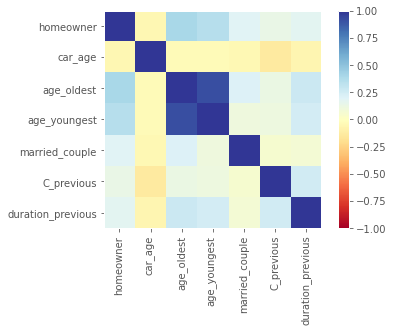

In [20]:
# the same information displayed visually
plt.imshow(
    df[predictors].corr(), # the correlation matrix
    vmin=-1,       # minimum value for the colorbar
    vmax=1,        # maximum value for the colorbar
    cmap='RdYlBu', # color scheme
)
plt.grid(False)

# label the axes:
plt.xticks(range(len(predictors)), labels=predictors, rotation=90)
plt.yticks(range(len(predictors)), labels=predictors)
plt.colorbar()

The correlation between `age_youngest` and `age_oldest` is 0.917221, and due to this, we remove `age_oldest` - the two predictors are redundant and carry almost the same information.

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.** One possible solution is given below:

In [21]:
df_drop_oldest = df_region.drop(columns=['age_oldest'])
train_drop_oldest = df_drop_oldest.loc[idx_train]
test_drop_oldest = df_drop_oldest.loc[idx_test]
model_region_no_oldest = smf.ols(formula = 'cost ~ region + car_value + A + E + F + G + homeowner + car_age + age_youngest + married_couple + C_previous + duration_previous + I(age_youngest**2) + I(car_age**2) + car_value*age_youngest', data = train_drop_oldest).fit()
print(model_region_no_oldest.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     203.5
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:18:26   Log-Likelihood:                -62223.
No. Observations:               12344   AIC:                         1.245e+05
Df Residuals:                   12307   BIC:                         1.248e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

We notice that the coefficient for `age_youngest` has changed: it has gone from `-3.0910` in the previous model to `-2.7194`. In extreme cases, the sign of the coefficient can even flip. This illustrates how much multicollinearity can destabilize a model.

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.** A natural step is to visualize the residuals, via plots like histograms and the QQ plot. Let's start with the histogram:

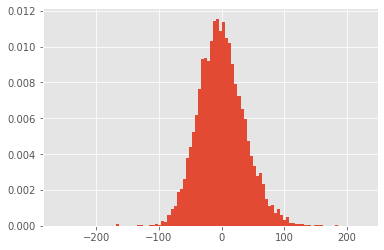

In [22]:
plt.hist(model_region_no_oldest.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label='residuals' # label for legend
);

This seems ok. Let's look at the QQ plot now:

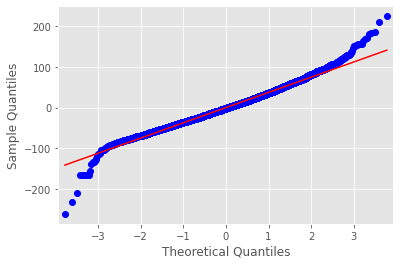

In [23]:
sm.qqplot(model_region_no_oldest.resid, line='s');

Now we begin to see some issues. We notice that the far away quantiles do not conform to the line – this means that the tails are fatter than were apparent at first from the histogram. This means that we should consider some variable transformations to get this back in line.

### Exercise 9 (25 min):

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.** Shown below:

In [24]:
from scipy import stats

price, fitted_lambda = stats.boxcox(df_drop_oldest['cost'])
round(fitted_lambda, 2)

0.53

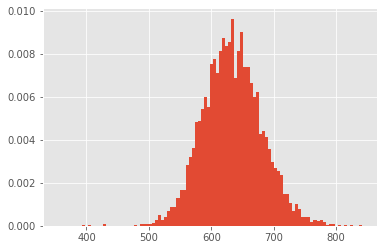

In [25]:
plt.hist(df_drop_oldest['cost'], density=True, bins = 100);

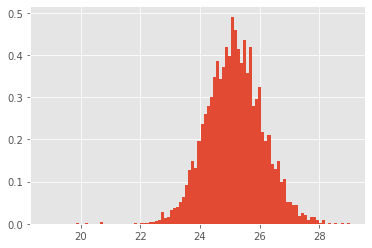

In [26]:
plt.hist(np.sqrt(df_drop_oldest['cost']), density=True, bins = 100);

They both look okay, though the square root transformation looks slightly better visually.

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.** One possible solution is shown below:

In [28]:
df_drop_oldest['cost_sqrt'] = np.sqrt(df_drop_oldest['cost'])
train_drop_oldest = df_drop_oldest.loc[idx_train]
test_drop_oldest = df_drop_oldest.loc[idx_test]
model_region_no_oldest_box_cox = smf.ols(formula = 'cost_sqrt ~ group_size + homeowner + car_age + car_value + risk_factor + age_youngest + married_couple + C_previous + duration_previous + A + B + C + D + E + F + G + region', data = train_drop_oldest).fit()
print(model_region_no_oldest_box_cox.summary())

                            OLS Regression Results                            
Dep. Variable:              cost_sqrt   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:18:44   Log-Likelihood:                -13929.
No. Observations:               12344   AIC:                         2.793e+04
Df Residuals:                   12309   BIC:                         2.819e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              25.8739    

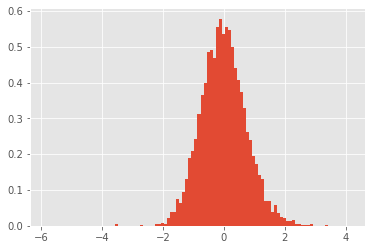

In [29]:
plt.hist(model_region_no_oldest_box_cox.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label='residuals' # label for legend
);

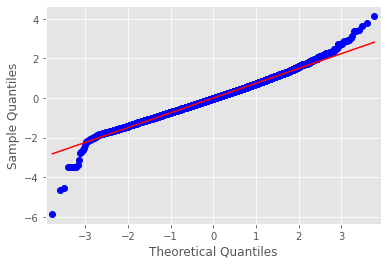

In [30]:
sm.qqplot(model_region_no_oldest_box_cox.resid, line='s');

We see that the AIC of `model_region_no_oldest_box_cox` is much better than that of `model_region_no_oldest`. However, the QQ plot is still exhibiting strange tail behavior.

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 